# Ford GoBike System Data Visualization

The dataset of Ford GoBike System which we will be using is of Decembe,2018.This dataset includes information about individual rides made in a bike-sharing system in the greater San Francisco Bay area.

In [1]:
#import necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

In [2]:
#Reading a file to a dataframe
df=pd.read_csv('201812-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No
1,63587,2018-12-31 19:00:32.1210,2019-01-01 12:40:19.3660,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4281,Customer,1995.0,Male,No
2,64169,2018-12-31 15:09:01.0820,2019-01-01 08:58:30.0910,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4267,Customer,1988.0,Male,No
3,30550,2018-12-31 19:26:20.7750,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes
4,2150,2018-12-31 23:59:12.0970,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,4820,Customer,NaN,NaN,No


## Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131363 entries, 0 to 131362
Data columns (total 16 columns):
duration_sec               131363 non-null int64
start_time                 131363 non-null object
end_time                   131363 non-null object
start_station_id           131171 non-null float64
start_station_name         131171 non-null object
start_station_latitude     131363 non-null float64
start_station_longitude    131363 non-null float64
end_station_id             131171 non-null float64
end_station_name           131171 non-null object
end_station_latitude       131363 non-null float64
end_station_longitude      131363 non-null float64
bike_id                    131363 non-null int64
user_type                  131363 non-null object
member_birth_year          126352 non-null float64
member_gender              126352 non-null object
bike_share_for_all_trip    131363 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 16.0+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,131363.000000,131171.000000,131363.000000,131363.000000,131171.000000,131363.000000,131363.000000,131363.000000,126352.000000
mean,770.675365,132.167346,37.765679,-122.350232,130.045696,37.765821,-122.349782,3174.437566,1983.684390
std,1750.519849,109.716315,0.106910,0.124425,109.560874,0.106766,0.123923,1698.973870,10.491775
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1888.000000
25%,337.000000,41.000000,37.770083,-122.411901,36.000000,37.770407,-122.411647,1696.000000,1978.000000
50%,536.000000,97.000000,37.780955,-122.398436,93.000000,37.781010,-122.398285,3249.000000,1986.000000
75%,839.000000,211.000000,37.795392,-122.291209,203.000000,37.795393,-122.291376,4816.000000,1991.000000
max,86039.000000,381.000000,37.880222,-121.874119,381.000000,37.880222,-121.874119,6234.000000,2000.000000


In [6]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
29784,353,2018-12-21 09:03:17.7410,2018-12-21 09:09:11.1660,114.0,Rhode Island St at 17th St,37.764478,-122.40257,104.0,4th St at 16th St,37.767045,-122.390833,5299,Subscriber,1986.0,Male,No


In [7]:
# Convert timestamp column from object type to datetime type
df['start_time'] = pd.to_datetime(df['start_time'])

In [8]:
## Convert timestamp column from object type to datetime type
df['end_time'] = pd.to_datetime(df['end_time'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131363 entries, 0 to 131362
Data columns (total 16 columns):
duration_sec               131363 non-null int64
start_time                 131363 non-null datetime64[ns]
end_time                   131363 non-null datetime64[ns]
start_station_id           131171 non-null float64
start_station_name         131171 non-null object
start_station_latitude     131363 non-null float64
start_station_longitude    131363 non-null float64
end_station_id             131171 non-null float64
end_station_name           131171 non-null object
end_station_latitude       131363 non-null float64
end_station_longitude      131363 non-null float64
bike_id                    131363 non-null int64
user_type                  131363 non-null object
member_birth_year          126352 non-null float64
member_gender              126352 non-null object
bike_share_for_all_trip    131363 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [10]:
# Check if there are null values present
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [11]:
#Check sum of all null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            192
start_station_name          192
start_station_latitude        0
start_station_longitude       0
end_station_id              192
end_station_name            192
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          5011
member_gender              5011
bike_share_for_all_trip       0
dtype: int64

In [12]:
#Drop null values
df=df.dropna().reset_index(drop=True)

In [13]:
df.shape

(126162, 16)

### What features of our dataset are important for exploration?

The main features of our dataset includes duration_sec,user_type,member_birth_year,member_gender.etc., We can further calculate age of riders using member_birth_year feature. 

*Now our dataset is ready for exploratory and explanatory analyses.*

## Data Visualization

### Univariate Exploration

In [14]:
df['member_gender'].value_counts()

Male      94724
Female    29389
Other      2049
Name: member_gender, dtype: int64

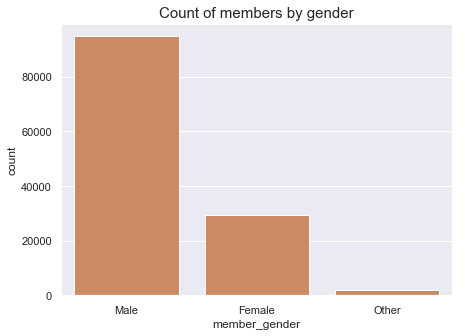

In [15]:
#Plotting a bar graph of member_gender
sb.set(rc={'figure.figsize':(7,5)})
base_color=sb.color_palette()[1]
sb.countplot(data=df,x='member_gender',color=base_color,order = df['member_gender'].value_counts().index);
plt.title('Count of members by gender', fontsize=15)

**Most of the riders are males**

In [16]:
df['user_type'].value_counts()

Subscriber    112397
Customer       13765
Name: user_type, dtype: int64

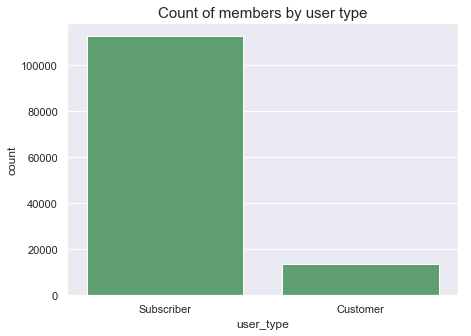

In [17]:
#Plotting a bar graph of user_type
sb.set(rc={'figure.figsize':(7,5)})
base_color=sb.color_palette()[2]
sb.countplot(data=df,x='user_type',color=base_color,order = df['user_type'].value_counts().index);
plt.title('Count of members by user type', fontsize=15)

**More number of Subscribers take ride as compared to Customers**

In [18]:
df['bike_share_for_all_trip'].value_counts()

No     112830
Yes     13332
Name: bike_share_for_all_trip, dtype: int64

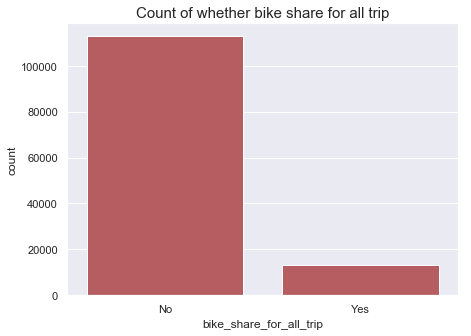

In [19]:
##Plotting a bar graph of bike_share_for_all_trip
sb.set(rc={'figure.figsize':(7,5)})
base_color=sb.color_palette()[3]
sb.countplot(data=df,x='bike_share_for_all_trip',color=base_color,order = df['bike_share_for_all_trip'].value_counts().index);
plt.title('Count of whether bike share for all trip', fontsize=15)

**The number of bike share for all trip are very less**

In [20]:
#Creating a new column called 'age' using column member_birth_year
df['age']=2018-df['member_birth_year']

In [21]:
df['age'].describe()

count    126162.000000
mean         34.321507
std          10.494397
min          18.000000
25%          27.000000
50%          32.000000
75%          40.000000
max         130.000000
Name: age, dtype: float64

As we can see, the maximum age is 130 which is not valid. So,this means that there might be some outliers.

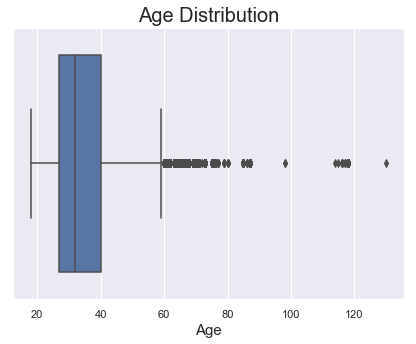

In [22]:
#Creating a box plot to identify outliers
plt.figure(figsize=(7,5))
sb.boxplot(data=df, x='age')
plt.title("Age Distribution", fontsize=20)
plt.xlabel("Age", fontsize=15);

In [23]:
#Removing outliers with age>100
df=df.query('age < 100')

In [24]:
df=df.reset_index(drop=True)

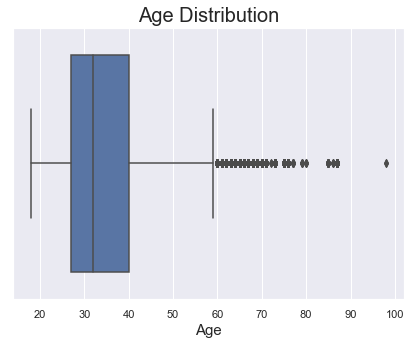

In [25]:
#Again plotting a box plot with outliers removed.
plt.figure(figsize=(7,5))
sb.boxplot(data=df, x='age')
plt.title("Age Distribution", fontsize=20)
plt.xlabel("Age", fontsize=15);

Text(0.5,0,'Age')

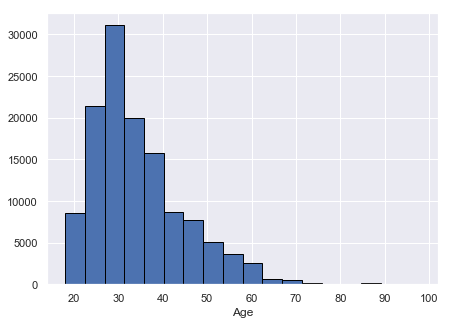

In [26]:
#Plotting a Histogram of age.
plt.hist(df['age'], edgecolor = 'black',bins = int(180/10))
plt.xlabel('Age')

**From the *Box plot* and *Histgram* we can bserve that maximum riders are of age group 25-40 years.** 

Text(0.5,0,'Duration in seconds')

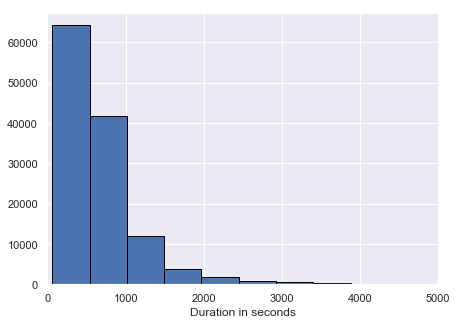

In [27]:
#Plotting a Histogram of duration_sec.
plt.hist(df['duration_sec'], edgecolor = 'black',bins = int(180/1))
plt.xlim([0, 5000])
plt.xlabel('Duration in seconds')

**Maximum duration of rides lies within the range 0-15000 seconds.**

In [28]:
#Finding the count of all the start_station_name.
df['start_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          2679
Market St at 10th St                                               2491
San Francisco Ferry Building (Harry Bridges Plaza)                 2248
Powell St BART Station (Market St at 4th St)                       2158
San Francisco Caltrain (Townsend St at 4th St)                     2077
Berry St at 4th St                                                 2001
Montgomery St BART Station (Market St at 2nd St)                   1918
Steuart St at Market St                                            1802
Powell St BART Station (Market St at 5th St)                       1774
The Embarcadero at Sansome St                                      1734
Howard St at Beale St                                              1690
Beale St at Harrison St                                            1379
Embarcadero BART Station (Beale St at Market St)                   1374
2nd St at Townsend St                                           

In [29]:
#Finding the count of all the end_station_name.
df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          3228
San Francisco Ferry Building (Harry Bridges Plaza)                 2616
Market St at 10th St                                               2597
San Francisco Caltrain (Townsend St at 4th St)                     2578
Powell St BART Station (Market St at 4th St)                       2313
Montgomery St BART Station (Market St at 2nd St)                   2106
The Embarcadero at Sansome St                                      2103
Berry St at 4th St                                                 2033
Steuart St at Market St                                            1870
Powell St BART Station (Market St at 5th St)                       1822
Howard St at Beale St                                              1493
Beale St at Harrison St                                            1397
Civic Center/UN Plaza BART Station (Market St at McAllister St)    1316
2nd St at Townsend St                                           

In [30]:
#Creating a new column named 'Day_of_week' using column 'start_time'.
df['Day_of_week'] = df['start_time'].dt.dayofweek

In [31]:
df['Day_of_week'].value_counts()

0    21539
3    21400
2    20414
1    19526
4    18708
5    13780
6    10729
Name: Day_of_week, dtype: int64

Text(0.5,1,'Count of trips by Days of week')

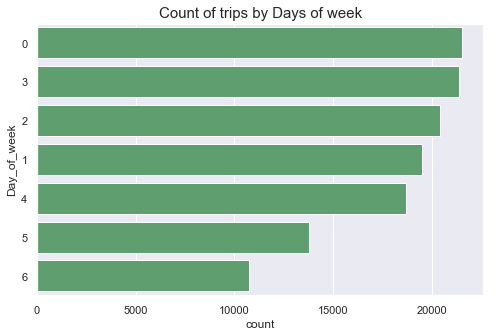

In [32]:
#Plotting a bar graph of Day_of_week.
sb.set(rc={'figure.figsize':(8,5)})
base_color=sb.color_palette()[2]
sb.countplot(data=df,y='Day_of_week',color=base_color,order=df['Day_of_week'].value_counts().index);
plt.title('Count of trips by Days of week', fontsize=15)

**Maximum number of rides were taken on *Monday* and *Wednesday*, followed by *Tuesday*.Less rides were taen on Saturday and Sunday** 

### What conclusions can be drawn from Univariate Exploration?

1. The number of Male riders are more as compared to Female and Other riders.

2. The number of Subscribers who take ride are more as compared to Customers who take ride.

3. The number of bike share for all trip are very less.

4. Maximum number of riders are of age group 25-40 years.

5. Maximum number of rides were taken on Monday and Wednesday.

6. Maximum number of rides were taken for the duration of 0-15000 seconds i.e., approximately near to 4.2 hours.

## Bivariate Exploration

In Bivariate Exploration, we will investigate and find out relation between 2 variables in our data.

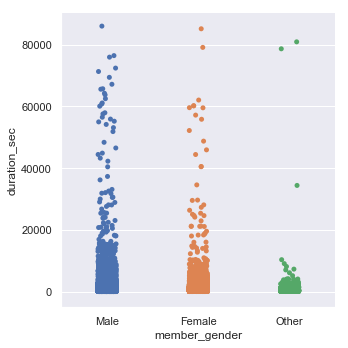

In [33]:
#Plotting a categorical plot using member_gender and duration_sec.
sb.catplot(x='member_gender', y='duration_sec',hue='member_gender', data=df)

**The ride duration is more in case of male riders as compared to female and other riders.**

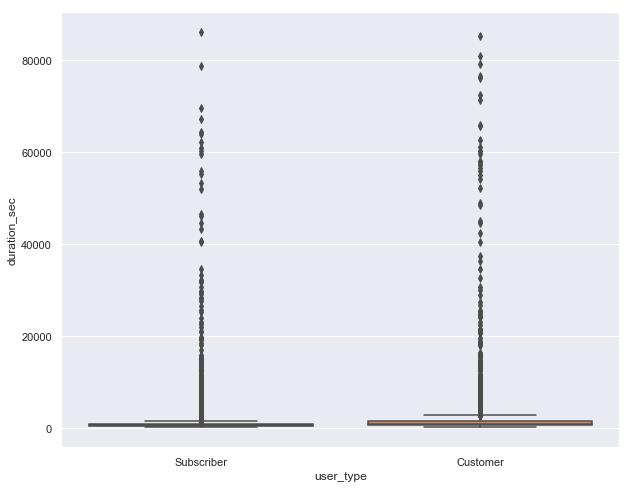

In [34]:
#Plotting a box plot using user_type and duration_sec.
sb.set(rc={'figure.figsize':(10,8)})
sb.boxplot(x="user_type", y="duration_sec", data=df)

We can clearly see that there are a lot of outliers. It is important to remove them.

In [35]:
#Removing outliers with duration_sec>8000
df=df.query('duration_sec < 8000')

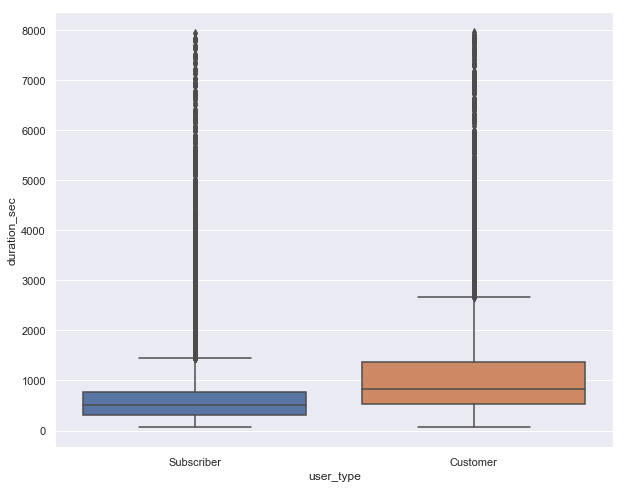

In [36]:
#Plotting the box plot again after removing outliers
sb.set(rc={'figure.figsize':(10,8)})
sb.boxplot(x="user_type", y="duration_sec", data=df)

**The duration of ride in case of Customers(non-subscribers) is more as compared to Subscribers**

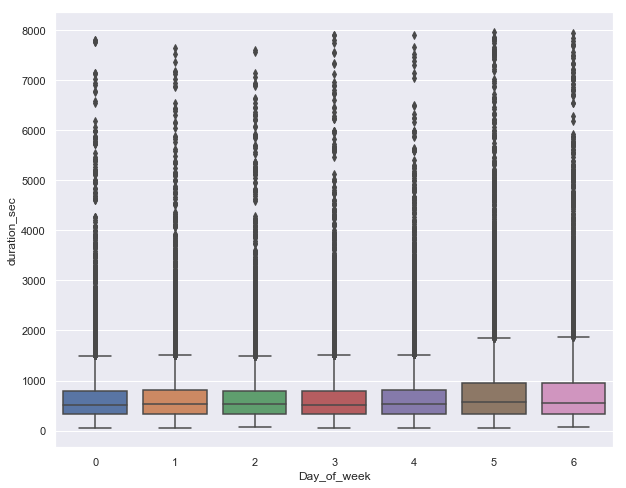

In [37]:
#Plotting a box plot using Day_of_week and duration_sec.
sb.set(rc={'figure.figsize':(10,8)})
sb.boxplot(x="Day_of_week", y="duration_sec", data=df)

**The duration of ride(in seconds) is more during the weekends i.e., Saturday and Sunday.**

In [38]:
#Grouping by using two columns i.e., 'user_type' and 'Day_of_week'.
x=df.groupby(['user_type','Day_of_week']).size()

In [39]:
#Creating a pivot in order to plot heat map.
x=x.reset_index(name='count')
x=x.pivot(index='user_type',columns='Day_of_week',values='count')

In [40]:
x

Day_of_week,0,1,2,3,4,5,6
user_type,,,,,,,
Customer,1828,1789,1788,1991,1950,2318,1885
Subscriber,19680,17700,18578,19358,16716,11399,8786


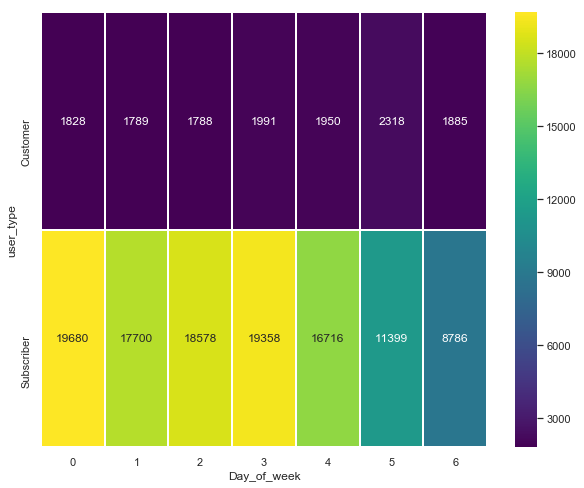

In [41]:
#Plotting a heat map using the above pivot.
sb.heatmap(x,linewidth=1, annot=True,fmt='0.0f',cmap='viridis')

**More number of subscribers took ride on Monday and Tuesday**

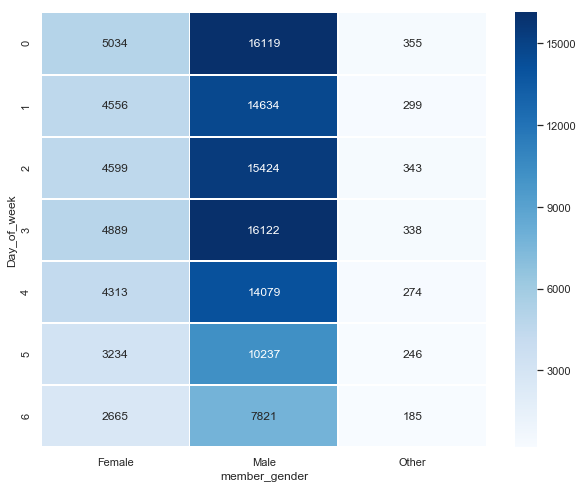

In [42]:
#Grouping by using two columns i.e., 'member_gender' and 'Day_of_week'.
#Creating a pivot in order to plot heat map.
#Plotting a heat map using the above pivot.
y = df.groupby(['member_gender','Day_of_week']).size()
y=y.reset_index(name='count')
y = y.pivot("Day_of_week", "member_gender", "count")
sb.heatmap(y,linewidth=1,annot=True,cmap="Blues",fmt='g')

**More number of males took ride on Monday and Tuesday**

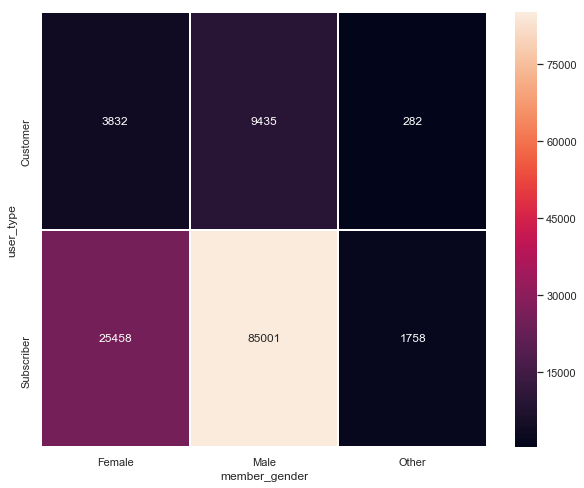

In [43]:
#Grouping by using two columns i.e., 'member_gender' and 'user_type'.
#Creating a pivot in order to plot heat map.
#Plotting a heat map using the above pivot.
z = df.groupby(['member_gender','user_type']).size()
z=z.reset_index(name='count')
z = z.pivot("user_type", "member_gender", "count")
sb.heatmap(z,linewidth=1,annot=True,fmt='g')

**Maximum number of males are subscribers**

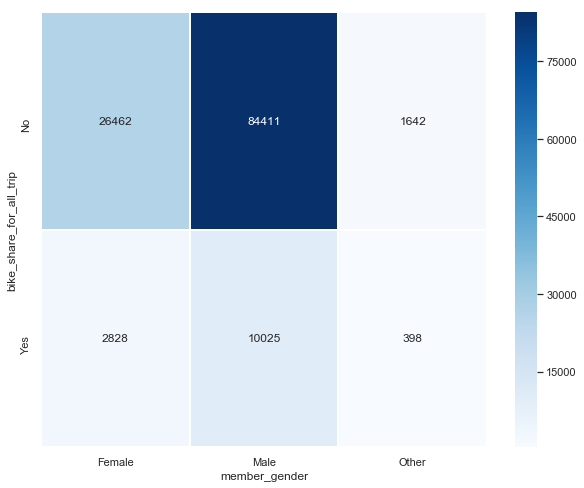

In [44]:
#Grouping by using two columns i.e., 'bike_share_for_all_trip' and 'member_gender'.
#Creating a pivot in order to plot heat map.
#Plotting a heat map using the above pivot.
a = df.groupby(['bike_share_for_all_trip','member_gender']).size()
a=a.reset_index(name='count')
a = a.pivot("bike_share_for_all_trip", "member_gender", "count")
sb.heatmap(a,linewidth=1,annot=True,fmt='g',cmap="Blues")

**Bike share for all trip was a little more for male riders**

Text(0.5,1,'Duration of trip by rider Age')

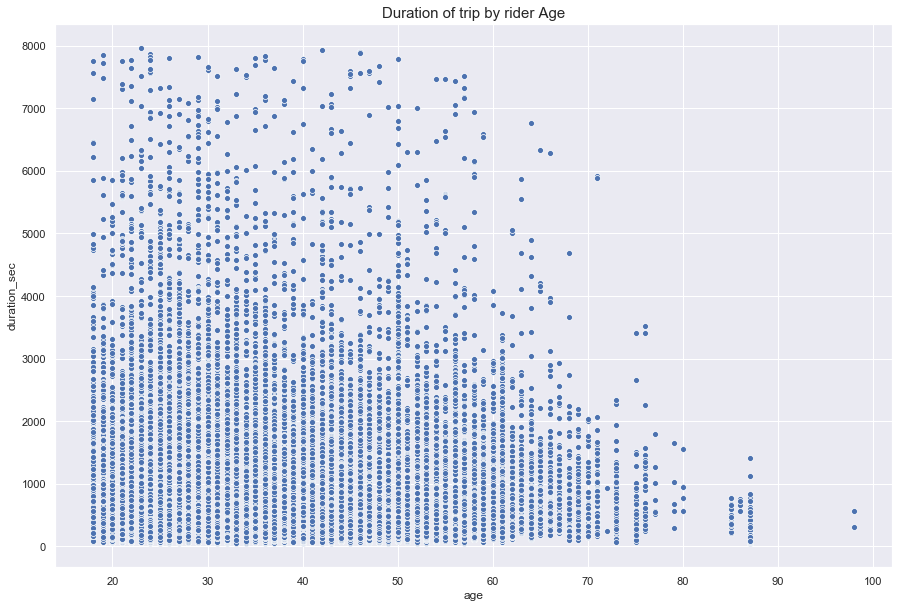

In [45]:
#Plotting a scatterplot using 'age' and 'duration_sec'
sb.set(rc={'figure.figsize':(15,10)})
sb.scatterplot(data=df,x='age',y='duration_sec');
plt.title('Duration of trip by rider Age', fontsize=15)

**We can observe that, mostly people of age group 20-40 took ride within 2500 seconds of duration. The old people too lesser rides and that to for shorter duration.**

### What conclusions can be drawn from Bivariate Exploration?

1. The ride duration is more in case of male riders as compared to female and other riders.

2. The ride duration is more in case of Customers as compared to Subscribers.

3. The ride duration is more during the weekends i.e., Saturday and Sunday.

4. More number of subscribers took ride on Monday and Tuesday. Whereas the customers too ride mostly on Saturday, Sunday and Wednesday.

5. More number of males took ride on Monday and Tuesday. Whereas,females and others took ride mostly on Monday and Wednesday.

6. Maximum number of subscribers are males.

7. Bike share for all trip was a little more for male riders

## Multivariate Exploration

In Multivariate Exploration, we will investigate and find out relation between 3 or more variables in our data.

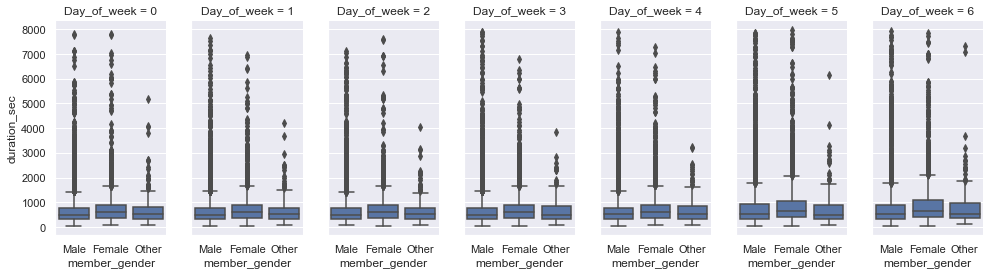

In [46]:
#Using Faceting for analysing 3 columns i.e., 'Day_of_week', 'member_gender' and 'duration_sec'.
g = sb.FacetGrid(data = df, col = 'Day_of_week', height = 4,aspect=0.5)
g.map(sb.boxplot, 'member_gender', 'duration_sec',order=["Male","Female","Other"])

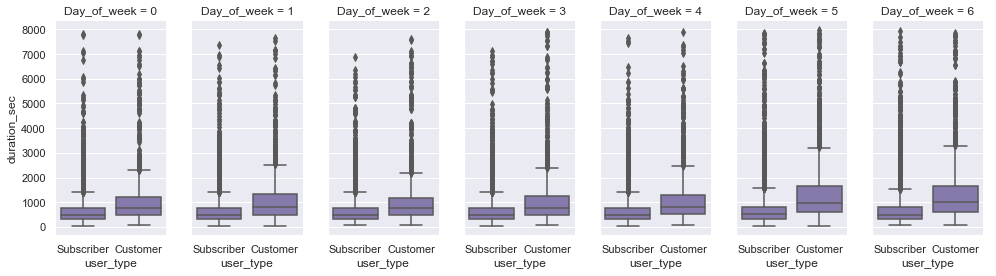

In [47]:
#Using Faceting for analysing 3 columns i.e., 'Day_of_week', 'user_type' and 'duration_sec'.
g = sb.FacetGrid(data = df, col = 'Day_of_week', height = 4,aspect=0.5)
g.map(sb.boxplot, 'user_type', 'duration_sec',order=["Subscriber","Customer"],color="m")

**The duration of rides by Customers were more on Saturday and Sunday**.

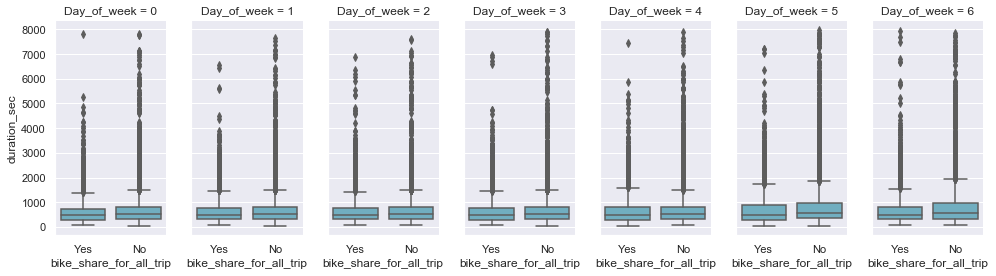

In [48]:
#Using Faceting for analysing 3 columns i.e., 'Day_of_week', 'bike_share_for_all_trip' and 'duration_sec'.
g = sb.FacetGrid(data = df, col = 'Day_of_week', height = 4,aspect=0.5)
g.map(sb.boxplot, 'bike_share_for_all_trip', 'duration_sec',order=["Yes","No"],color="c")

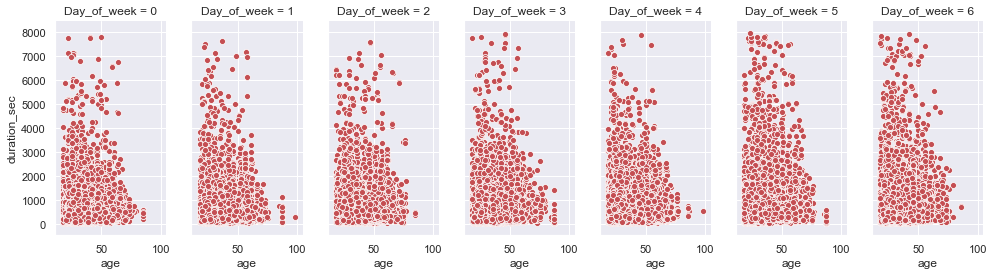

In [49]:
#Using Faceting for analysing 3 columns i.e., 'Day_of_week', 'age' and 'duration_sec'.
g = sb.FacetGrid(data = df, col = 'Day_of_week', height = 4,aspect=0.5)
g.map(sb.scatterplot, 'age', 'duration_sec',color="r")

**On Saturday and Sunday, duration of ride was more than 5000 seconds of users of age upto 45 years.**

### What conclusions can be drawn from Multivariate Exploration?

1. On Saturday and Sunday, duration for rides was more than 5000 seconds for users of age group upto 45 years.

2. The duration of rides by Customers were more as compared to subscribers and that too was maximum on Saturday and Sunday.

3. The ride duration is more in case of males and females on Saturdays and Sundays.